# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
#Step 1: The data file is in google drive. To mount the drive on google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# read the data
#step 2 : Read appropriate csv file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/Python/week1/foodhub_order.csv')

# To see the first 5 rows
print("The first 5 rows of the data is given below", "\n")
df.head()

The first 5 rows of the data is given below 



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
#to copy the data, so that orginal data is not manipulated
data_new=df.copy()
# return the data frame stored in the label data_new. I will be using data_new from now on to perform the analysis.
# To see the first 5 rows

print("The first 5 rows of the copied data is given below", "\n")
data_new.head(5)

The first 5 rows of the copied data is given below 



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
# Use the shape functionality to get the number of rows and columns in a data frame
J=data_new.shape
print("The number of rows in the Food Hub data is",J[0],"\n","The number of columns in the Food Hub data is",J[1])
#returns the number of rows and columns in the data from the stored value J

The number of rows in the Food Hub data is 1898 
 The number of columns in the Food Hub data is 9


#### Observations:
The number of rows and columns in the Food Hub data are 1898 and 9, respectively


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
data_new.info()
#general code to print the type and corresponding column name for any dataframe
#step1: To extract names of all existing datatype, unique functionality is used so that its not repeated
datatype=data_new.dtypes.unique()

#step2 To create an array corresponding to number of unique data types
i=list(range(0,len(datatype)))

#To append columns of unique data types in the order of array we use for loop
a=[] #datatype appended to a
for c in i:
  a.append(list(data_new.select_dtypes(datatype[c])))
  print("The columns in food hub data that corresponds to type",datatype[c],"is",a[c],"\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
The columns in food hub data that corresponds to type int64 is ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time'] 

The columns in food hub data that corresponds to type object is ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rat

#### Observations:
The columns in food hub data that corresponds to type integer is order_id, customer_id, food_preparation_time, delivery_time,
The columns in food hub data that corresponds to type object is restaurant_name, cuisine_type, day_of_the_week, rating
The columns in food hub data that corresponds to type float is cost of order.

Here Rating is treated as an object, as they are fixed values from 1 to 5, or no rate given



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
#To check for missing values
display(data_new.isna().sum())
#returns the sum of null values for each column as an output
#There are no NaN values, but some of customers has not given any rating. I am not considering it as missing values.
#The count of no ratings can be found using value count function
print()
print("The value counts of unique values in rating")
data_new["rating"].value_counts()



order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


The value counts of unique values in rating


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are no missing values in any of the column. Some of the customers have not given any rating, they are not considered here as missing values. 736 customers has not given any rating for the order


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
#To get the average, minimum and maximum of all suitable columns
display(data_new.describe().T)
#To get the average, minimum and maximum for food preparation time
#round function is used to round to two decimal point
minim=round(data_new["food_preparation_time"].min(),2);
avg=round(data_new["food_preparation_time"].mean(),2);
maxim=round(data_new["food_preparation_time"].max(),2);
print()
print("The minimum, average and maximum time it takes for food to be prepared is",minim,",",avg,"and",maxim,"respectively")

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00



The minimum, average and maximum time it takes for food to be prepared is 20 , 27.37 and 35 respectively


#### Observations: The minimum, average and maximum time it takes for food to be prepared is 20 27.37 and 35 respectively

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
#To get the the number of orders with no rating, we need to find the value counts for "not given" ratings
#value counts function give the count for all unique values in the column rating
print("The value counts of unique values in rating")
data_new["rating"].value_counts()

The value counts of unique values in rating


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders do not have ratings


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

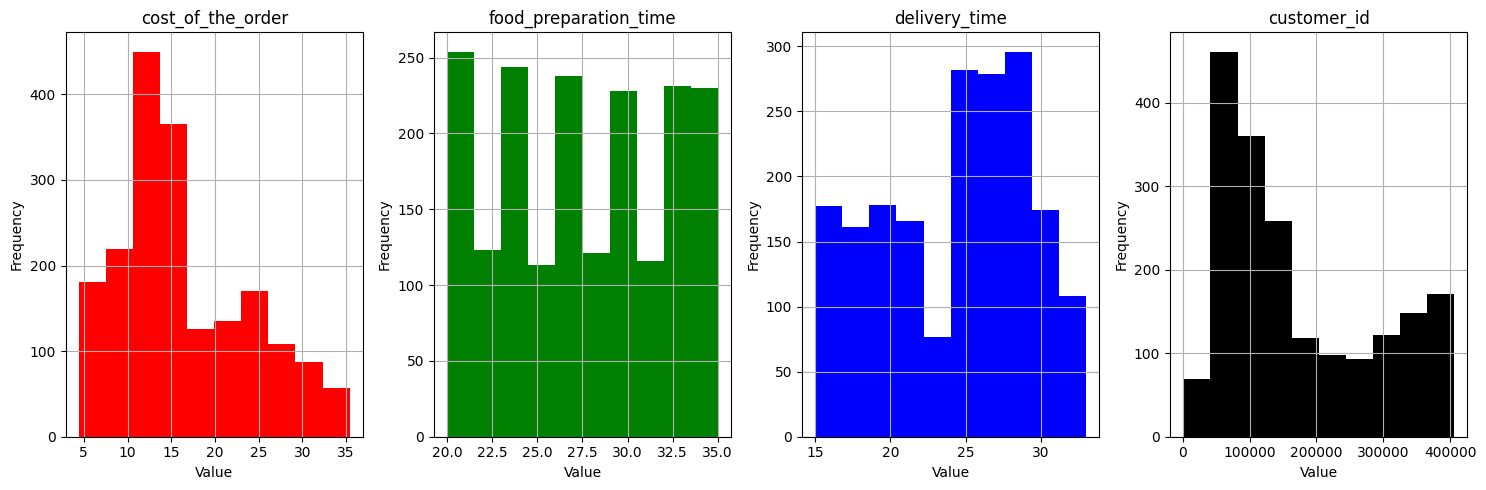

In [10]:
# Write the code here
#The observations for all the univariate analysis is given as summary for question 6
#To explore numerical variables histogarams can be plotted
#The columns in food hub data that corresponds to type integer is order_id, customer_id, food_preparation_time, delivery_time.
#The columns in food hub data that corresponds to type float is cost of order.
#Among these histogram can be plotted for food preparation time, delivery time, and cost of order and customer ID. Order ID though there are natural numbers, they are used to label the orders.
#Hence no inference canbe made from understanding the didtrubtion of order ID.
column=["cost_of_the_order","food_preparation_time","delivery_time","customer_id"]
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  #subplots as 3 columns in a row
clr=['red','g','b','black']                                  #color for subplot

#To subplot we use for loop
for name in column:
     index=column.index(name)                               #To get the index of category in column
     data_new.hist(name, ax=axes[index],color=clr[index])   #histogram plotted as a subplot
     axes[index].set_xlabel('Value')                        #xlabel
     axes[index].set_ylabel('Frequency')                    #ylabel


plt.tight_layout()     #To avoid overlap of ticklabels


plt.show()             # To display the plots




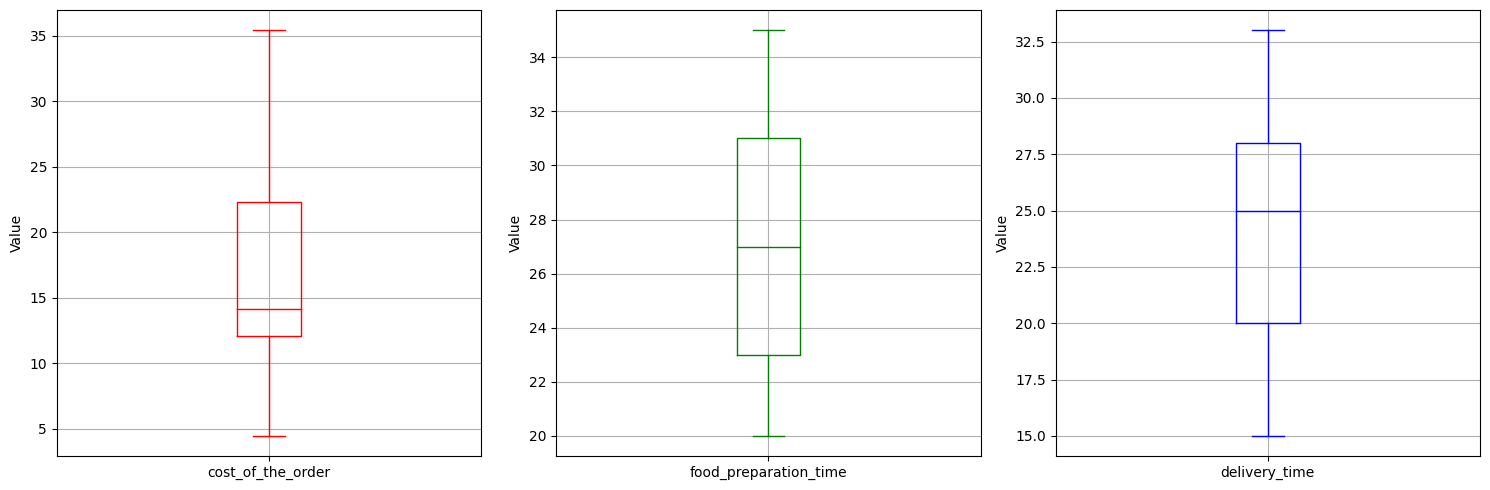

In [11]:
#Not repeating the usage of functionalities mentioned before
#The same code to plot a histogram is used except the plotting is box
column=["cost_of_the_order","food_preparation_time","delivery_time"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
clr=['red','g','b']

for name in column:
     index=column.index(name)
     data_new.boxplot(name, ax=axes[index],color=clr[index])   #plotted box in a loop
     axes[index].set_ylabel('Value')


plt.tight_layout()


plt.show()

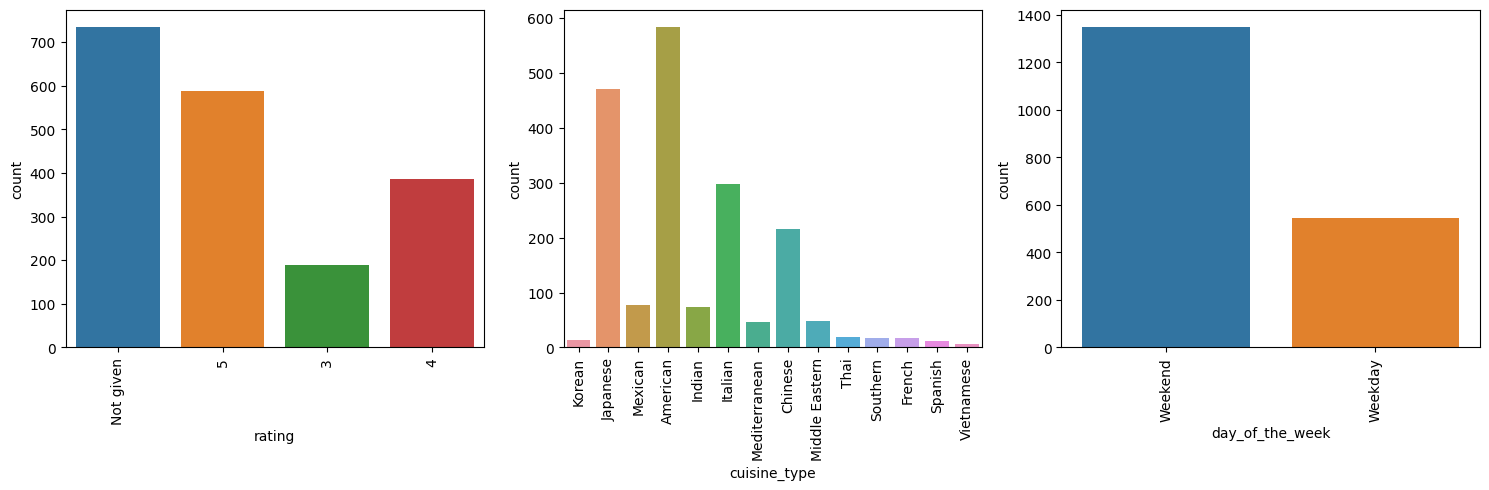

In [12]:
#Not repeating the usage of functionalities mentioned before
#The same code to plot a histogram is used except the plotting is count for categorical variables
column=["rating","cuisine_type","day_of_the_week"]
# Create a figure and axes using plt.subplots()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
clr=['red','g','b','black']

for name in column:
     index=column.index(name)
     sns.countplot(data=data_new,x=name,ax=axes[index])
     axes[index].tick_params(axis='x', rotation=90)



plt.tight_layout()

# Display the plots
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

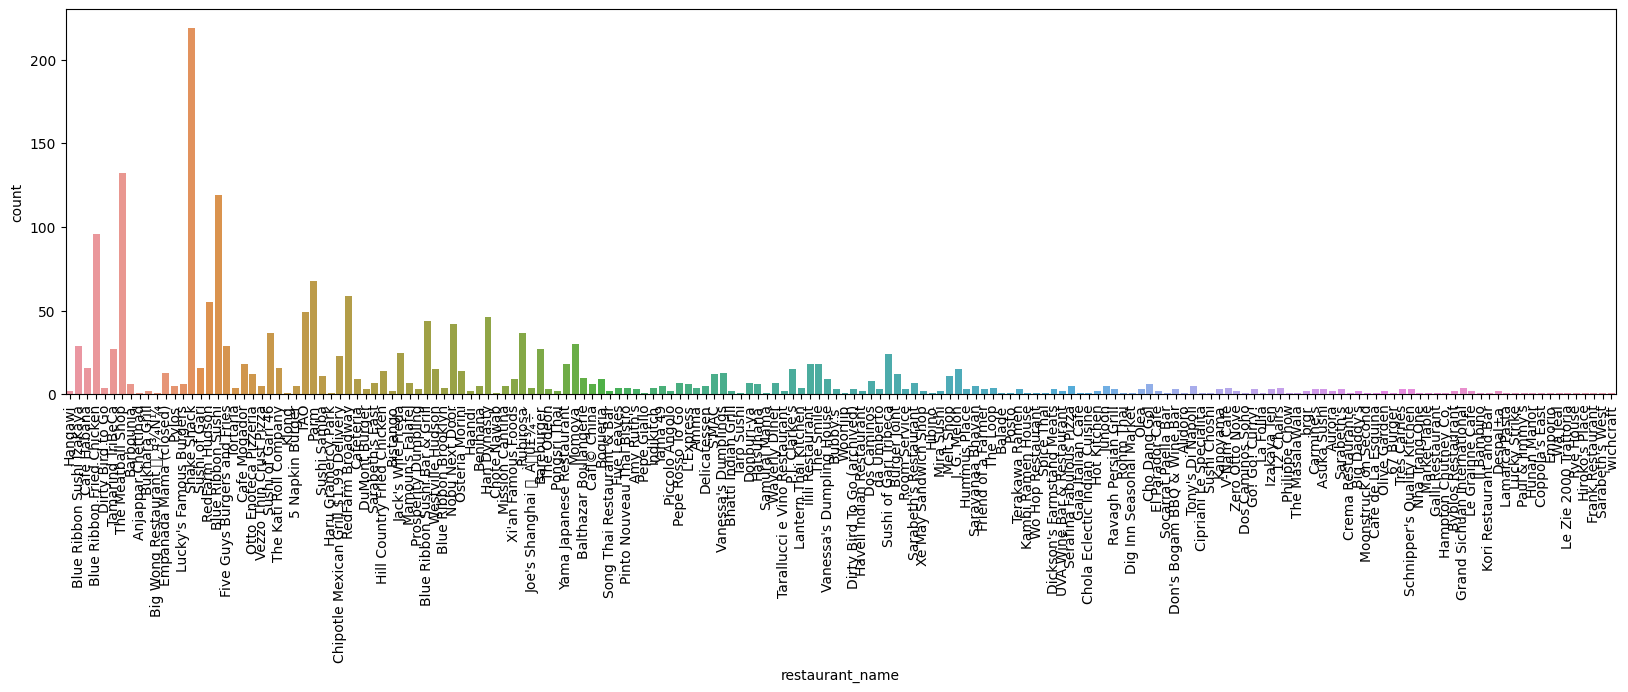

In [13]:
#Not repeating the usage of functionalities mentioned before
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.countplot(data=data_new,x="restaurant_name")  #Count plot for restaurant names
axes.tick_params(axis='x', rotation=90)  #This is seperately plotted, due to high number of categories, which when subplotted will be unclear

plt.show


#### Observations:
We see that customers have ordered mostly dishes in the price range of 10-20 dollars. The cost of the order is slightly right skewed. The food preparation time has larger counts at both lesser and larger durations, it is random. But if we see the delivery time, we can see approxiamtely similar range of counts in the delivery time < 24 min and a higher similar range of counts in the delivery time >25 min, which means delivery time distribution shows a trend. We can infer that some intial conditions are changed which resulted in an approximately uniform count icrease for delivery time>25 min. To understand the cause we can look the categorical variables.

From the categorical variables, the number of orders in the weekends are greater than weekdays. This could be the reason for change in delivery time, to confirm this we need to perform multivariate analysis. Majority of the customers has not given any rating. The most popular cuisine is American. It is hard to infer alot from the restaurant names count plot, but we can see, the restaurant with maximum orders have orders greater then 250

To see if there is a difference between the total number of orders placed, cost of orders in weekend and week day, we need to perform multivariate analysis



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [14]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
value=data_new["restaurant_name"].value_counts()   #value_counts function give how many times a unique restaurant name is repeated
print("The top 5 restaurants are","\n")            #The number of repetitions are the number of orders received
print(f"{'Restaurant':<27} {'Number of Orders':<18}")  #To print the restaurant name and no of order header as columns
print('-' * 45)                                        #To print a line between header and values

for index, count in value[:6].iteritems():             #To print the restaurant name and no of order values as columns
    print(f'{index:<27} {count:<18}')


The top 5 restaurants are 

Restaurant                  Number of Orders  
---------------------------------------------
Shake Shack                 219               
The Meatball Shop           132               
Blue Ribbon Sushi           119               
Blue Ribbon Fried Chicken   96                
Parm                        68                
RedFarm Broadway            59                


#### Observations:
Shake shack, The meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm and Red Farm Broadway are the top 5 restaurants with highest number of orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

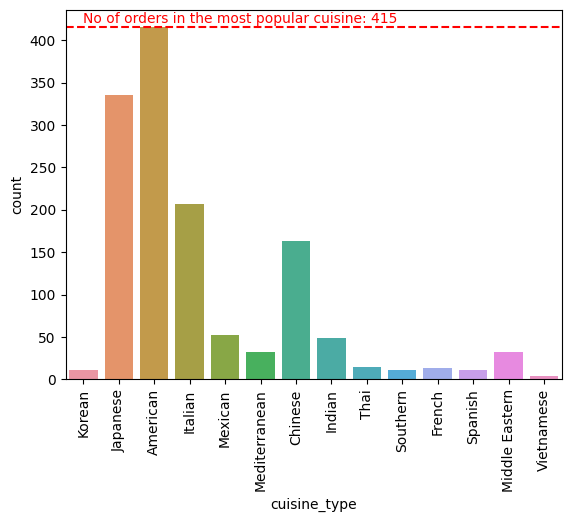

In [15]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
data_for_weekends=data_new[data_new["day_of_the_week"]=="Weekend"]  #Return food hub data only for weekends
most_popular_cuisine=data_for_weekends["cuisine_type"].value_counts().max()  #Returns the highest repeated cuisine
sns.countplot(data_for_weekends,x="cuisine_type")                             #cuisine count plot for weekend
plt.axhline(most_popular_cuisine, color='red', linestyle='--')                #To plot a line showing no of orderes of most popular cuisine

plt.text(0, most_popular_cuisine+6, f"No of orders in the most popular cuisine: {most_popular_cuisine}", color='red') # Annotate the no of orderes of most popular cuisine

plt.xticks(rotation=90)
plt.show()

#### Observations: The most popular cuisine during weekends is American, with a total number of orders equal to 415. The second, third and fourth most popular cuisine is Japanese, Italian and Chinese respectvely, after which for all the cusine the total number of orders are less than 100.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

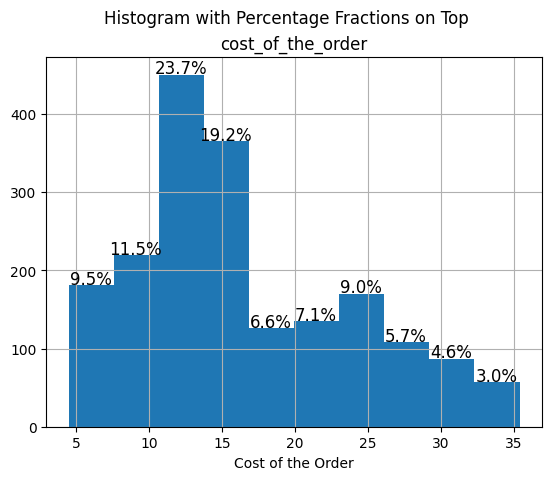

29.24 % orders cost more then 20 dollars


In [16]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
Total=len(data_new["cost_of_the_order"])                                         #Returns the size of cost of order column
axes=data_new.hist("cost_of_the_order")
data_per=data_new[data_new["cost_of_the_order"]>20]                              #Returns food hub data with cost of order >20
percentage_above20=round((len(data_per["cost_of_the_order"])/Total)*100,2)       #Returns percentage for cost above 20, round function, round the output number two mentioned decimal places
for ax in axes.flatten():                                                        #Returns multidimensional data frame converted to one dimensional series
    for i in ax.patches:                                                         #Returns each bin as patches
        percentage = '{:.1f}%'.format(100 * i.get_height() / Total)              #Returns Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                                 #To set Width of the plot
        y = i.get_height() + 1.5                                                 #To set Height of the plot
        ax.annotate(percentage, (x, y), size=12, ha='center')                    #To annotate the percentage in the plot


plt.xlabel('Cost of the Order')
plt.suptitle('Histogram with Percentage Fractions on Top')
plt.show()
print(percentage_above20,"% orders cost more then 20 dollars")


#### Observations:
29.24 % orders cost more then 20 dollars. We can see the same from the plot


### **Question 10**: What is the mean order delivery time? [1 mark]

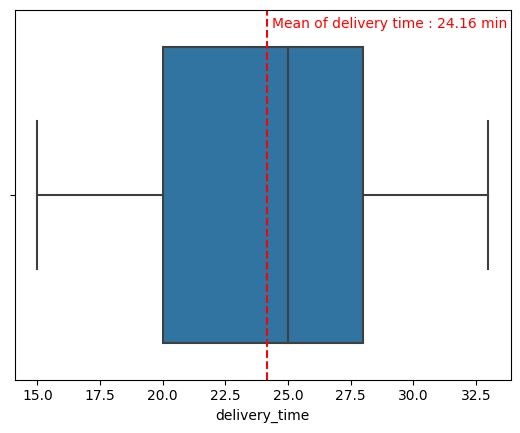

In [17]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
sns.boxplot(data=data_new,x="delivery_time")
mean=round((data_new["delivery_time"]).mean(),2)  #To get the mean of delivery time to two decimal points
plt.axvline(mean, color='red', linestyle='--')    #To plot vertical line corresponding to mean in graph
plt.text(mean+0.2,-0.45, f"Mean of delivery time : {mean} min", color='red') #To write mean as text in graph
plt.show()


#### Observations:
 The mean delivery time is 24.16 minutes. It is less than the median. The delivery time is slightly left skewed


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [18]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
a=data_new["customer_id"].value_counts()      #Gives the no of orders placed under each customer ID
print("The top 3 frequent customers are","\n")
print(f"{'Customer ID':<15} {'Number of Orders':<18}")
print('-' * 35)

for index, count in a[:3].iteritems():   #a by defaut will be in descending order of the counts. Hence the top 3 customers can be found by outputting first 3 rows
    print(f'{index:<15} {count:<18}')

The top 3 frequent customers are 

Customer ID     Number of Orders  
-----------------------------------
52832           13                
47440           10                
83287           9                 


#### Observations:
The top 3 customers gave an order 13, 10 and 9 respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


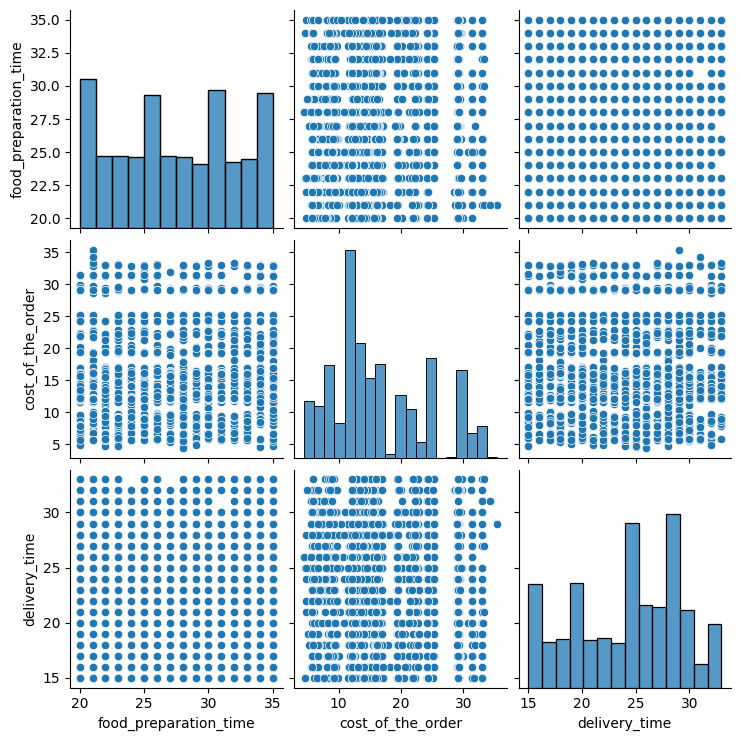

In [19]:
# Write the code here
#The observations for all the multivariate analysis is given as summary for question 12
#pairplot, gives an idea about the correlation between numerical values, (not the correlation value). Here I am only plotting pair plot for food prepartion time, cost of order and delivery time. Customer ID and order ID are just labels
sns.pairplot(data=data_new[['food_preparation_time','cost_of_the_order','delivery_time']])

<Axes: >

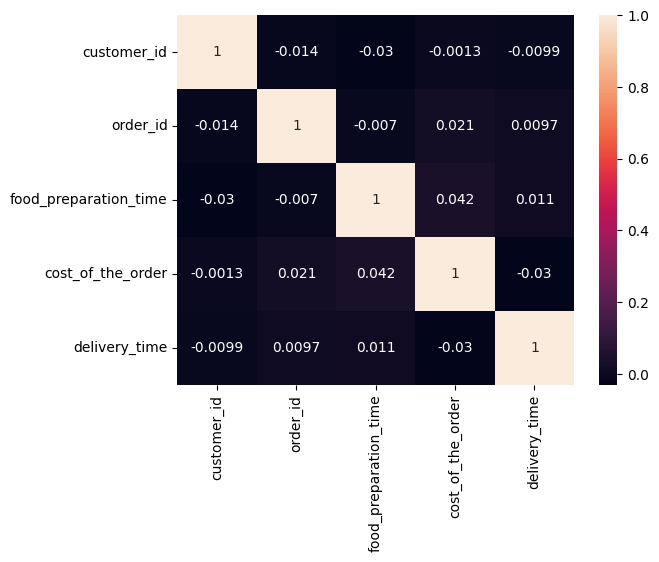

In [20]:
#a heat map can give the correlation values of numerical variables
sns.heatmap(data=data_new[['customer_id','order_id','food_preparation_time','cost_of_the_order','delivery_time']].corr(),annot=True)

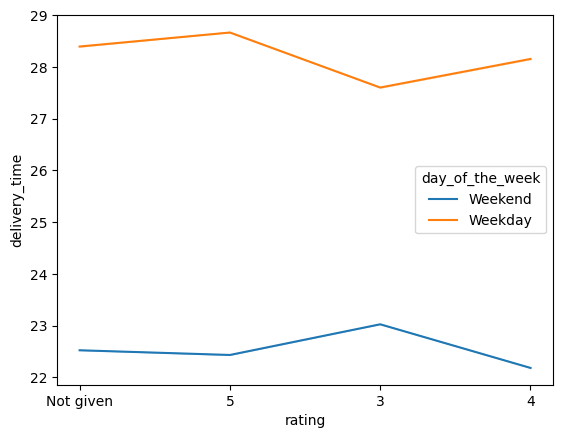

In [21]:
#Line plot to undersatnd relation between day of the week, rating and delivery time
sns.lineplot(data = data_new , x = 'rating' , y = 'delivery_time', ci = False ,hue='day_of_the_week'); #To understand if ratings are different in both weekend and week day

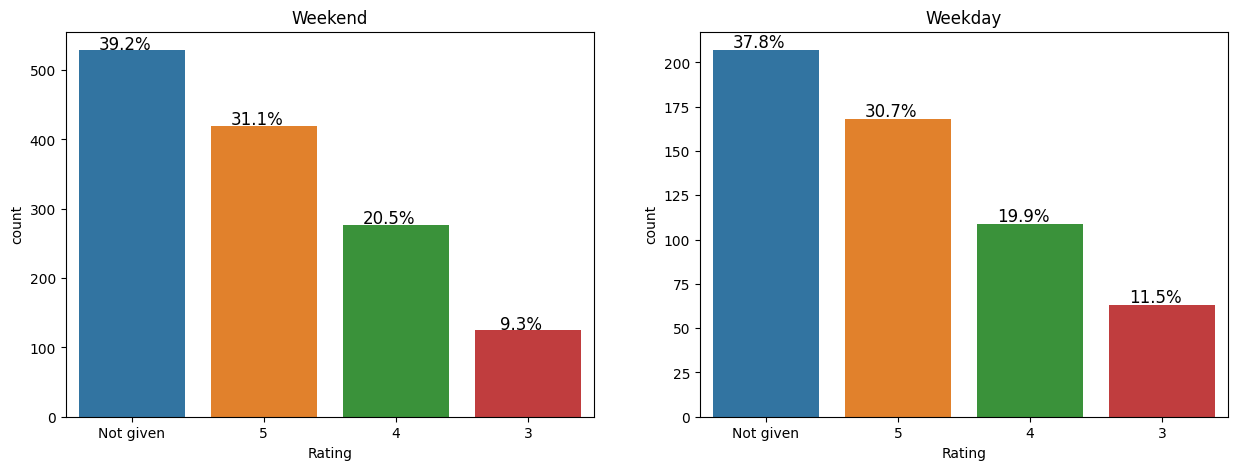

In [22]:

# Write the code here
#To understand if the rating proportions on week day and weekend are the same
#Not repeating the usage of functionalities mentioned before
Weekend_data=data_new[data_new["day_of_the_week"]=="Weekend"]
Weekday_data=data_new[data_new["day_of_the_week"]=="Weekday"]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
axes=sns.countplot(data=Weekend_data,x="rating",order=sorted(Weekday_data["rating"].unique(), reverse=True)) #Here reverse is used to give rating in descending order

for i in axes.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height() / len(Weekend_data["cost_of_the_order"]))  # Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                     # Width of the plot
        y = i.get_height() + 1.5                                      # Height of the plot
        axes.annotate(percentage, (x, y), size=12, ha='center')       # Annotate the percentage


plt.xlabel('Rating')
plt.title('Weekend')

plt.subplot(1,2,2)
axes=sns.countplot(data=Weekday_data,x="rating",order=sorted(Weekday_data["rating"].unique(), reverse=True))

for i in axes.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height() / len(Weekday_data["cost_of_the_order"]))  # Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                     # Width of the plot
        y = i.get_height() + 1.5                                      # Height of the plot
        axes.annotate(percentage, (x, y), size=12, ha='center')       # Annotate the percentage

plt.xlabel('Rating')
plt.title('Weekday')

plt.show()


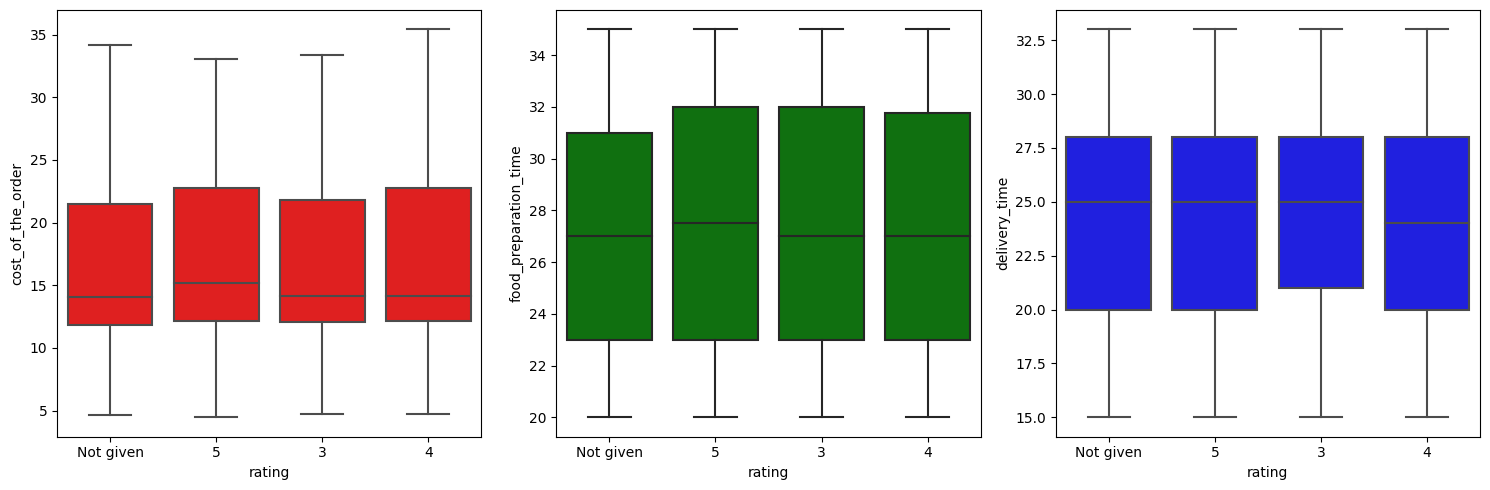

In [23]:
#To understand relation between numerical and categorical variables
#Not repeating the usage of functionalities mentioned before
column=["cost_of_the_order","food_preparation_time","delivery_time"]  #Numerical variable
row=["rating","cuisine_type","day_of_the_week"]   #categorical variables
# Create a figure and axes using plt.subplots()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
clr=['red','g','b']


for name in column:                                                  #box plot for numerical variables versus rating
     col_index=column.index(name)
     sns.boxplot(data=data_new,x=row[0],y=name, ax=axes[col_index],color=clr[col_index])
     axes[col_index].tick_params(axis='x', rotation=0)




# Display the plots
plt.tight_layout()

plt.show()

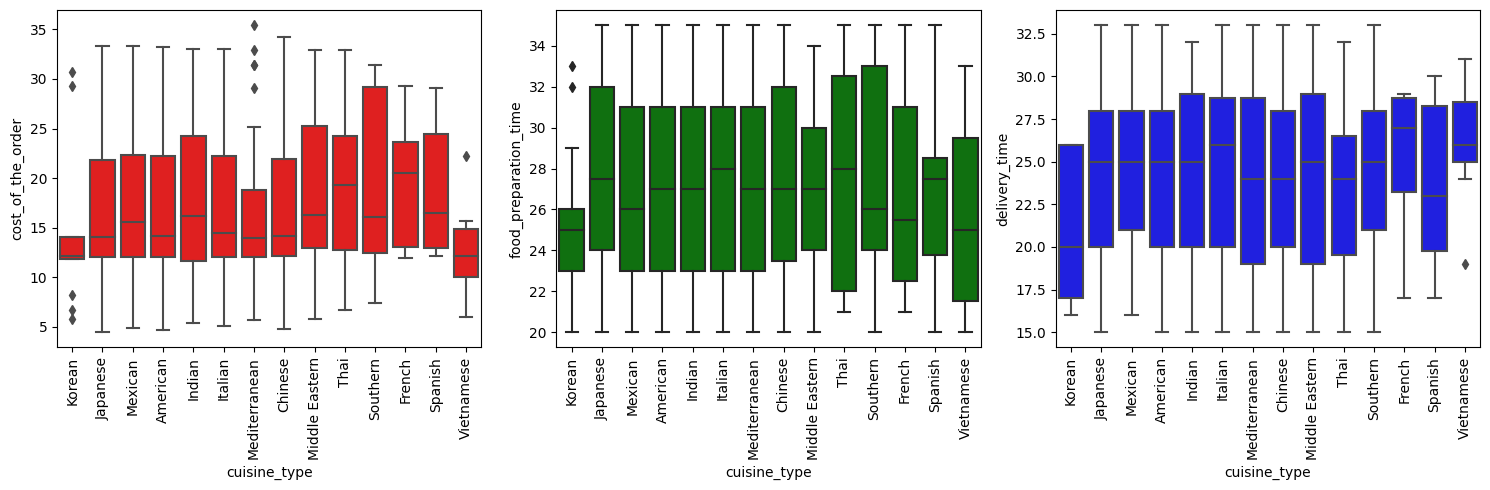

In [24]:
#Not repeating the usage of functionalities mentioned before
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
clr=['red','g','b']
for name in column:                                  #box plot for numerical variables versus cuisine type
     col_index=column.index(name)
     sns.boxplot(data=data_new,x=row[1],y=name, ax=axes[col_index],color=clr[col_index])
     axes[col_index].tick_params(axis='x', rotation=90)




plt.tight_layout()

# Display the plots
plt.show()

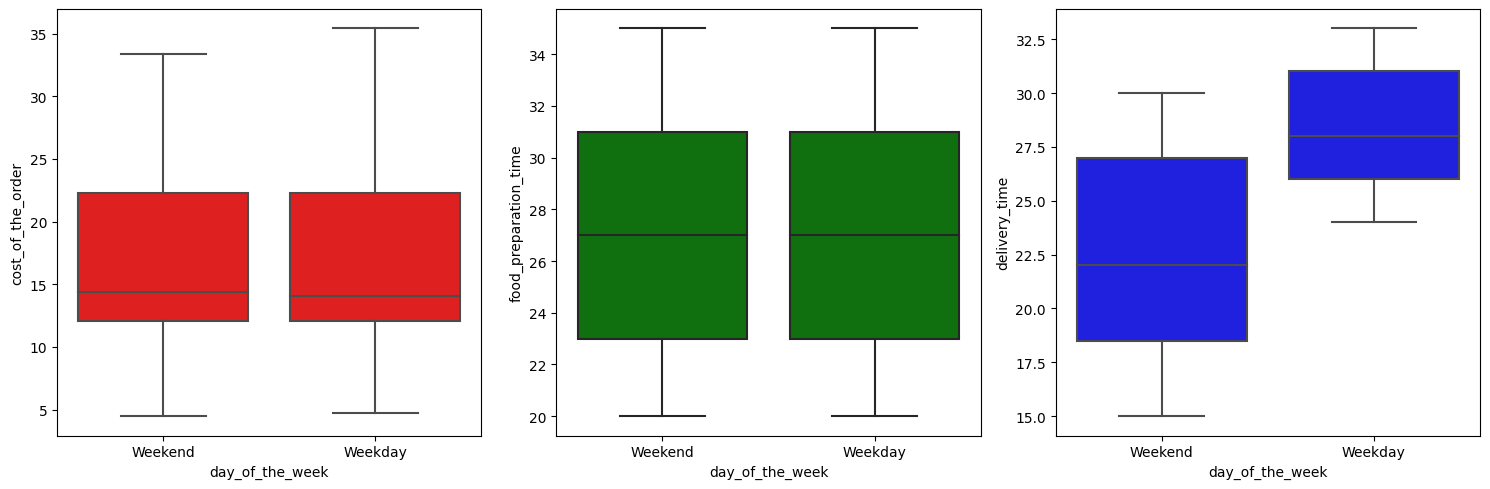

In [25]:
#Not repeating the usage of functionalities mentioned before
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
clr=['red','g','b']
for name in column:                                  #box plot for numerical variables versus day of the week
     col_index=column.index(name)
     sns.boxplot(data=data_new,x=row[2],y=name, ax=axes[col_index],color=clr[col_index])
     axes[col_index].tick_params(axis='x', rotation=0)




plt.tight_layout()

# Display the plots
plt.show()

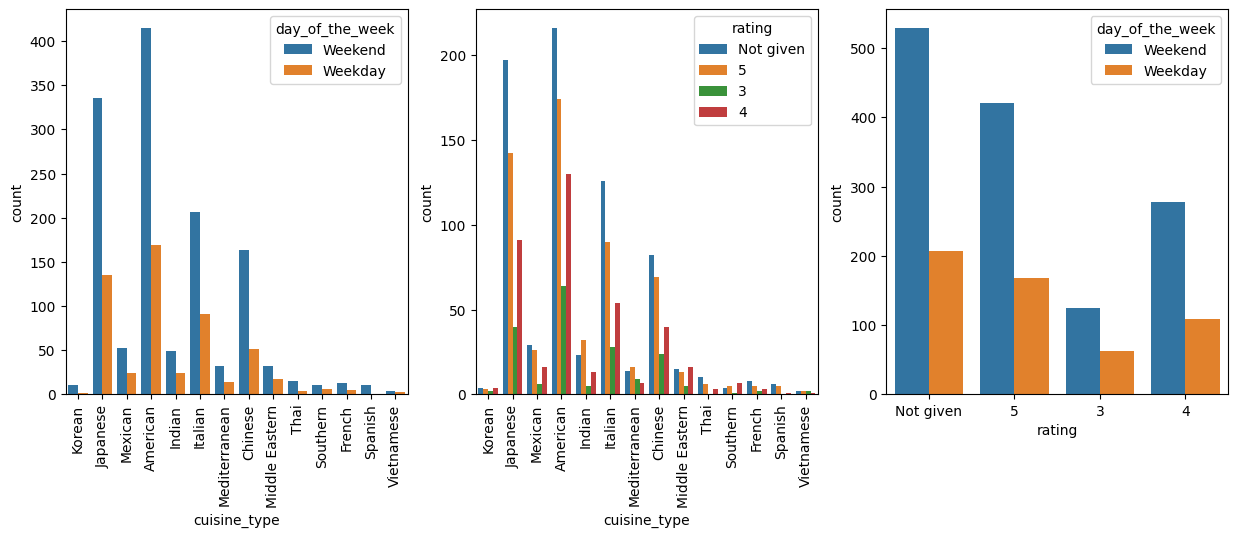

In [26]:
#Not repeating the usage of functionalities mentioned before
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.countplot(data=data_new,x="cuisine_type",hue="day_of_the_week")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(data=data_new,x="cuisine_type",hue="rating")
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(data=data_new,x="rating",hue="day_of_the_week")
plt.show()

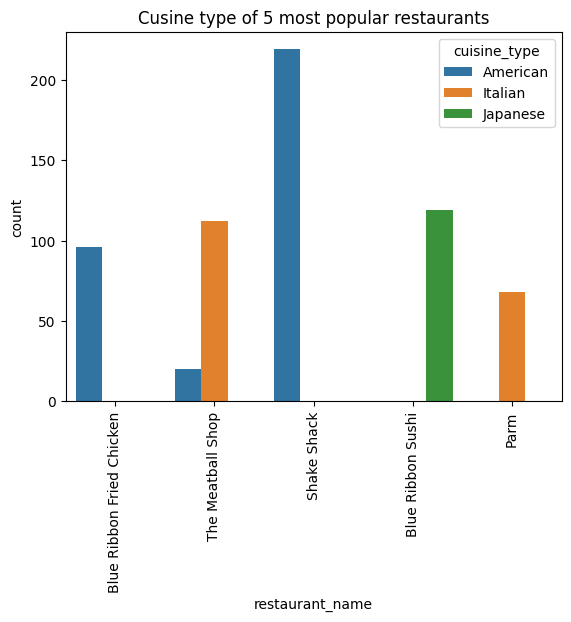

In [27]:
#To check cuisine type of first 5 most poupular restaurants
# Write the code here
#Not repeating the usage of functionalities mentioned before
value=data_new["restaurant_name"].value_counts()   #value_counts function give how many times a unique restaurant name is repeated
a=value[:5].index.tolist()  #To store the 5 most popular restaurant names in a

data1 = data_new[data_new["restaurant_name"].isin(a)]  #data of only 5 most popular restaurants
sns.countplot(data=data1,x="restaurant_name",hue="cuisine_type")   #To see the cuisine type
plt.xticks(rotation=90)    #To rotate xtick labels
plt.title("Cusine type of 5 most popular restaurants")
plt.show()






#### Observations:
There are no correlation between numerical variables. This can be inferred from near to 0, correlation values from the heat map and the trends from pair plot. This make sense, as food preparation time, should not effect the delivery time, or cost of order should not effect the delivery time. One can assume, if the cost of order is more, the food prepartion time might be more, but from the data it is clear they are not correlated.

We do not see any correlation on how cuisine type is infulenced by day type and rating. The only difference is the number of orders in weekend increases compared to weekday, because of which we see an overall increase in orders for each cuisine type during weekend. The rating ranges from 5, 4, 3 in simialr proportions for all cuisine type, the only difference again is the number of orders placed in each cuisine. American cuisine is the most popular one, and hence the most rated one (from countplot).

The ratings on weekend and weekday are almost in the same proportion (from percentage fraction of ratings for both weekday and weekend), which means ratings are only infulenced by the total number of orders. Rating could be be influenced by the cost of order, delivery time and food prepartion time. But we do not see such a correlation from the box plot. All the box plots versus rating are not largely skewed, for different rating the median for each category remains almost the same.

On weekday, there is a significant increase in delivery time, which can be seen both from box plot off delivery time versus day of the week. In weekdays, no of orders are less compared to weekend (count plot of day of the week), hence the rating count as well.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# Write the code here
#To find the restaurants with rating count more than 50, for some orders, there aren't any rating given, the not given ratings are considered as rating count 0.
#In that case we can remove the rating not given rows.
data_rating=data_new[data_new["rating"]!="Not given"]   #To eliminate rows of not given rating. A rating count is the sum of numbers of given rating
a=data_rating["restaurant_name"].value_counts()         #The value counts of unique restaurant name in the new data set (after eliminating non given ratings) will be its rating count
rest_above50=[]
for index, count in a.iteritems():
    if count > 50:
        rest_above50.append(index)                      #To store only the restaurants with rating count greater than 50, on a data frame res_above50

for rest in rest_above50:
    data1=(data_rating[data_new["restaurant_name"]==rest])                  #For each data set of particular restaurant name we exectute a for loop
    data1['rating'] = pd.to_numeric(data1['rating'], errors='coerce').fillna(0).astype(int)           #convert object type rating column to integer
    mean=round(data1["rating"].mean(),1)                                                              #Find the mean of rating
    if data1["rating"].mean()>4:
     print(rest,"eligible for promotional offer","with an average rating",mean)                      #print eligible for mean>4
    else:
     print(rest,"not eligible for promotional offer","with an average rating",mean)                  #print not eligible for mean<4




Shake Shack eligible for promotional offer with an average rating 4.3
The Meatball Shop eligible for promotional offer with an average rating 4.5
Blue Ribbon Sushi eligible for promotional offer with an average rating 4.2
Blue Ribbon Fried Chicken eligible for promotional offer with an average rating 4.3


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken are restaurants with rating count more than 50 and averge rating more than 4. The most popular cuisine amont customer is american japanese and italian, and shake shack, Blue Ribbon Fried Chicken has the first most popular cuisine:American; The Meat ball shop has both italian and american and blue ribbon sushi:japanes (from top 5 most popular restaurant versus cuisine plot)


---




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
cost_greater_20=data_new[data_new["cost_of_the_order"]>20]    #Returns data of cost>20
cost_greater_5=data_new[(data_new['cost_of_the_order'] > 5) & (data_new['cost_of_the_order'] <= 20)]         #Returns data of cost<20
netrevenue=round((cost_greater_20["cost_of_the_order"].sum())*0.25+(cost_greater_5["cost_of_the_order"].sum())*0.15,2)  #formula to 0.25*cost>20+0.15*cost>5
print("The net revenue company made is $",netrevenue,sep="")

The net revenue company made is $6166.3


#### Observations:
The net revenue company made is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

12.9% order took more than 60 minutes


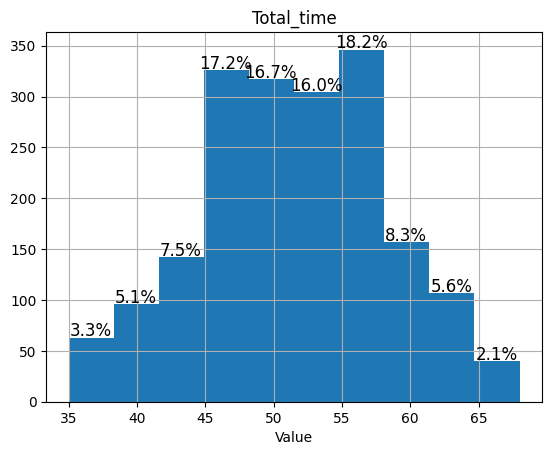

In [30]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
data_new["Total_time"]=data_new["delivery_time"]+data_new["food_preparation_time"];  #To get a column with summed delivery and food preparation time
Total_time=data_new["Total_time"].sum()                                              #To get sum of total time
time_greater_60=data_new[data_new["Total_time"]>60]
Total_time_order_greater_60=time_greater_60["Total_time"].sum()
percentage=round((Total_time_order_greater_60/Total_time)*100,1)
print(percentage,"% order took more than 60 minutes",sep="")

Total=len(data_new["Total_time"])
axes=data_new.hist("Total_time")

for ax in axes.flatten():
    for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height() / Total)  # Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                     # Width of the plot
        y = i.get_height() + 1.5                                      # Height of the plot
        ax.annotate(percentage, (x, y), size=12, ha='center')       # Annotate the percentage

# Set x-axis label and title for the whole figure
plt.xlabel('Value')


# Display the plot
plt.show()


#### Observations:
12.9% order took more than 60 minutes


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

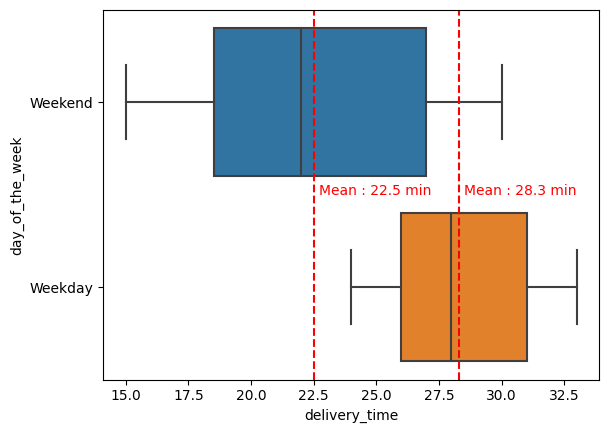

In [31]:
# Write the code here
#Not repeating the usage of functionalities mentioned before
sns.boxplot(data=data_new,x="delivery_time",y="day_of_the_week")
Weekend_data=data_new[data_new["day_of_the_week"]=="Weekend"]
Weekday_data=data_new[data_new["day_of_the_week"]=="Weekday"]
mean_we=round(Weekend_data["delivery_time"].mean(),1)
mean_wd=round(Weekday_data["delivery_time"].mean(),1)
plt.axvline(mean_we, color='red', linestyle='--')
plt.text(mean_we+0.2,0.5, f"Mean : {mean_we} min", color='red')
plt.axvline(mean_wd, color='red', linestyle='--')
plt.text(mean_wd+0.2,0.5, f"Mean : {mean_wd} min", color='red')
# Display the plots
plt.show()

#### Observations:
Delivery time is higher for week day.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most popular cuisine among the customers are American, Japanese and Italian, despite of weekend and weekday. The number of orders during weekend is more than weekday, probably because people are free from work. The delivery time is less during weekends probably due to the reduced traffic, as in weekdays more people are driving to and from work. The rating count is more on weekend due to increased number of orders, but the rating do not have a correlation on cost of order, food quality and delivery time. We are given an overall rating, we do not know how customers differently rate categories in food delivery. Hence ratings do not have a particular trend, rather it appears to be random.

### Recommendations:

*  Resaurants would be able to improve their business if the dishes of popular cuisines or fusions of popular cusinies are included in their menu. Restaurants can include fast foods, which require less food preparation time, thus reducing the overall order delivery time. The company can provide wallet points to customers who give ratings, and provide seperate options for rating categories like, overall delivery time from whenthey placed the order, quality of food, and packaging. Thus we could make much better analysis on the ratings,  on how people are effected by delivery time, food quality and cuisine.

---